In [155]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep
import time
from scipy.special import softmax

env = gym.make('MountainCar-v0')

#### Mountain Car Problem
1. Action Space: motor = (left, neutral, right):int
2. Observation Space: np.array([velocity, position])
    - Veclocity = (-0.07, 0.07)
    - Position = (-1.2, 0.6)

In [156]:
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box(2,)


### Train

In [157]:
class State:
    def __init__(self):
        self.pos = None
        self.vel = None

class Agent:
    def __init__(self, env):
        self.velocityLimit = np.array([env.observation_space.low[1], env.observation_space.high[1]])
        self.positionLimit = np.array([env.observation_space.low[0], env.observation_space.high[0]])
        self.velocityStep, self.positionStep = 0.005, 0.1
        self.velocitySpace = np.arange(self.velocityLimit[0], self.velocityLimit[1] 
                                       + self.velocityStep, self.velocityStep)
        self.positionSpace = np.arange(self.positionLimit[0], self.positionLimit[1] 
                                       + self.positionStep, self.positionStep)
        self.m, self.n, self.n_action = len(self.velocitySpace), len(self.positionSpace), 3
        self.Q = np.full(shape = (self.m, self.n, 3),
                                       fill_value = 0.0, dtype = np.float32)
        self.Policy = np.full(shape = (self.m, self.n, 3), 
                              fill_value = 1.0/3.0)
        self.collectiveRecord = []
        self.success = []
        
    def getActionValueIndex(self, state):
#         print(self.positionLimit)
        posOffset = state[0] - self.positionLimit[0]
        velOffset = state[1] - self.velocityLimit[0]
        posInd = posOffset // self.positionStep
        velInd = velOffset // self.velocityStep
        
        return np.array([velInd, posInd], dtype= np.int)
  
    def getAction(self, state):
        ind = self.getActionValueIndex(state, 0)
        p = self.Policy[ind[0], ind[1], :]
        action = np.random.choice([0, 1, 2], size = 1, p = p)
        return action[0]

In [158]:
env = gym.make('MountainCar-v0')
agent = Agent(env)
env.seed(0)
print(agent.Policy.shape)

(30, 20, 3)


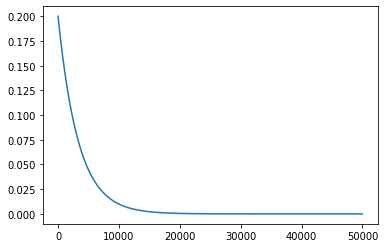

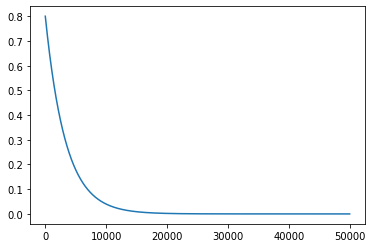

In [159]:
eps = 0.8
alpha = 0.2
epsReduction = 0.01
alphaDecay = 0.9997
t = []
t1 = []
for _ in range(50000):
    t.append(alpha)
    t1.append(eps)
    eps = max(0, eps * alphaDecay)
    alpha = alpha*alphaDecay
plt.plot(t)
plt.show()
plt.plot(t1)
plt.show()

#### SARSA($\lambda$)

#### Goal: 
- Solving the problem means average reward of -110 or more for 100 consecutive iterations.

#### Points:
1. Gives reward of 110-125
    - eps = 0.8, epsDecay = 0.999
    - alpha = 0.2, alphaDecay = 0.999
    - LAMBDa = 0.8, alpha decay = 0.95 after every 100 iteration, minLAMBDA = 0.4

In [160]:
# changed_eps = []
# changed_alpha = []
# eps = 0.8
# alpha = 0.2
# LAMBDA = 0.8
# alphaDecay = 0.999
# epsDecay = 0.995
# agent.e = np.zeros(shape = (agent.m, agent.n, 3))
# for i_eps in tqdm(range(1, 4001)):
#     state = env.reset()
#     gamma = 1.0
#     ind = agent.getActionValueIndex(state)
#     if np.random.random() < 1 - eps:
#         action = np.argmax(agent.Q[ind[0], ind[1], :]) 
#     else:
#         action = np.random.randint(0, 3)
    
#     for t in range(201):
#         ind = agent.getActionValueIndex(state)
#         nextState, reward, done, info = env.step(action)
#         nextInd = agent.getActionValueIndex(nextState)
        
#         if np.random.random() < 1 - eps:
#             nextAction = np.argmax(agent.Q[nextInd[0], nextInd[1], :]) 
#         else: 
#             nextAction = np.random.randint(0, 3)
    
#         delta = reward + gamma * agent.Q[nextInd[0],nextInd[1],nextAction] - agent.Q[ind[0],ind[1],action]
#         agent.e[ind[0],ind[1],action] += 1
 
#         agent.Q = np.add(agent.Q, np.multiply(alpha * delta, agent.e))
#         agent.e = np.multiply(gamma * LAMBDA, agent.e)
        
#         if done: 
#             if t < 199:
#                 agent.success.append((i_eps, t))
#             agent.collectiveRecord.append(-t)
#             eps = max(0.0, eps * epsDecay)
#             alpha = max(0.0, alpha * alphaDecay)
# #             if eps < 0.009 and i_eps < 2000:
# #                 eps = 0.01
# #                 changed_eps.append(i_eps)
# #             if alpha < 0.005 and i_eps < 2000:
# #                 alpha = 0.01
#             break
#         state = nextState
#         action = nextAction
# env.close()

In [161]:
changed_eps = []
changed_alpha = []
eps = 0.8
alpha = 0.2
LAMBDA = 0.8
alphaDecay = 0.999
epsDecay = 0.995
agent.e = np.zeros(shape = (agent.m, agent.n, 3))
for i_eps in tqdm(range(1, 4001)):
    state = env.reset()
    gamma = 1.0
    ind = agent.getActionValueIndex(state)
    if np.random.random() < 1 - eps:
        action = np.argmax(agent.Q[ind[0], ind[1], :]) 
    else:
        action = np.random.randint(0, 3)
    
    for t in range(201):
        ind = agent.getActionValueIndex(state)
        nextState, reward, done, info = env.step(action)
        nextInd = agent.getActionValueIndex(nextState)
        
        if np.random.random() < 1 - eps:
            nextAction = np.argmax(agent.Q[nextInd[0], nextInd[1], :]) 
        else: 
            nextAction = np.random.randint(0, 3)
    
        delta = reward + gamma * agent.Q[nextInd[0],nextInd[1],nextAction] - agent.Q[ind[0],ind[1],action]
        agent.e[ind[0],ind[1],action] += 1
 
        agent.Q = np.add(agent.Q, np.multiply(alpha * delta, agent.e))
        agent.e = np.multiply(gamma * LAMBDA, agent.e)
        
        if done: 
            if t < 199:
                agent.success.append((i_eps, t))
            agent.collectiveRecord.append(-t)
            eps = max(0.0, eps * epsDecay)
            alpha = max(0.0, alpha * alphaDecay)
            if eps < 0.009 and i_eps < 2000:
                eps = 0.01
            if alpha < 0.005 and i_eps < 2000:
                alpha = 0.01
            break
        state = nextState
        action = nextAction
# env.close()

100%|██████████| 4000/4000 [00:40<00:00, 98.42it/s] 


In [171]:
print(changed_alpha, changed_eps)

[] []


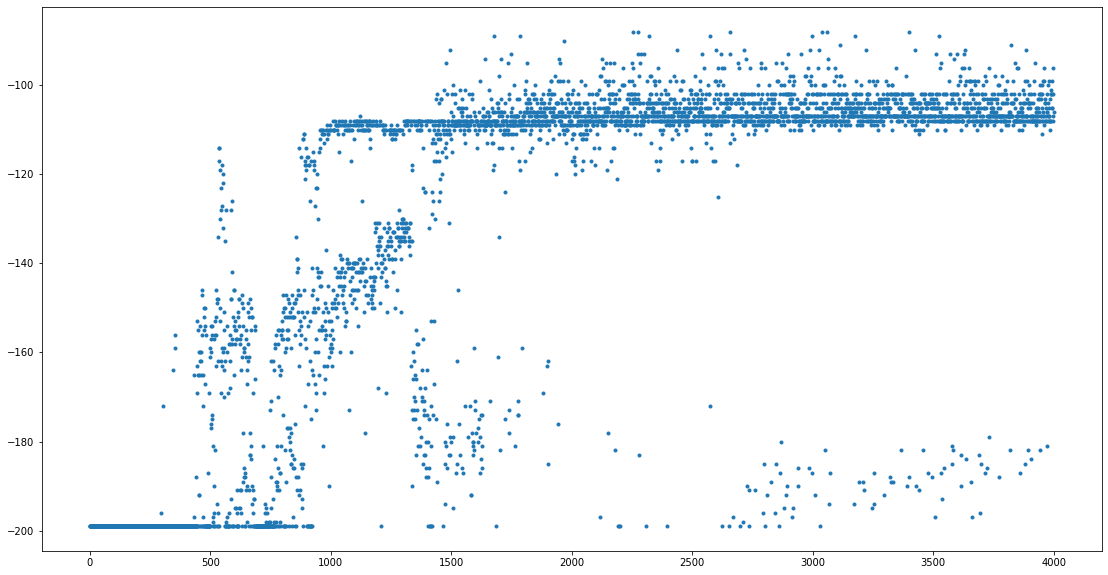

In [163]:
fig, ax = plt.subplots(figsize = (19, 10))
plt.plot(agent.collectiveRecord[:],'.')

In [164]:
print(np.min(agent.Q), np.max(agent.Q))

-127.54354162916398 0.0


In [165]:
# agent.Q

#### Test Over 100 episodes

In [172]:
for i_eps in (range(1, 100)):
    state = env.reset()
    gamma = 1.0
    ind = agent.getActionValueIndex(state)
    action = np.argmax(agent.Q[ind[0], ind[1], :]) 
    
    for t in range(201):
        ind = agent.getActionValueIndex(state)
        nextState, reward, done, info = env.step(action)
        nextInd = agent.getActionValueIndex(nextState)
        
        nextAction = np.argmax(agent.Q[nextInd[0], nextInd[1], :])
        
        if done: 
            if t < 199:
                agent.success.append((i_eps, t))
            agent.collectiveRecord.append(-t)
            break
        state = nextState
        action = nextAction
env.close()

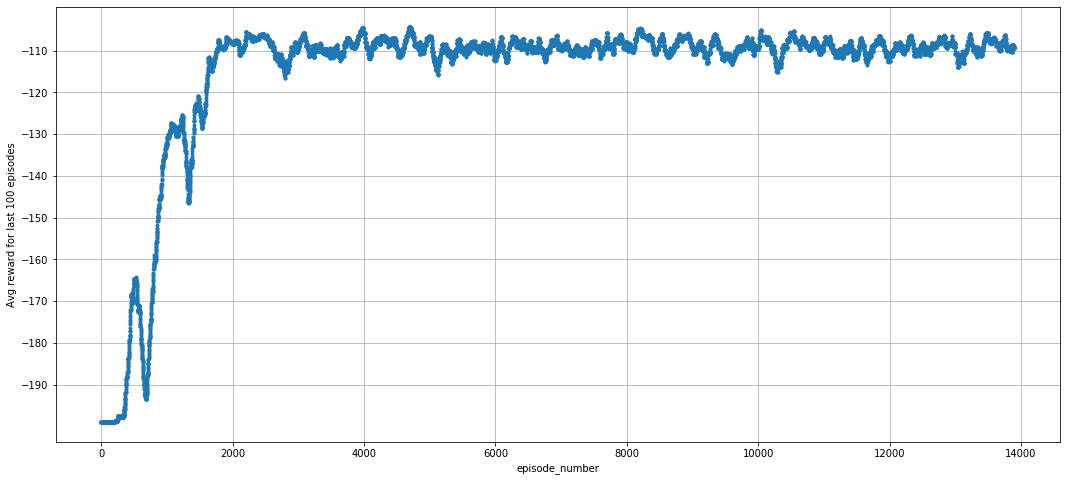

In [173]:
temp = []
for i in range(100, 4100):
    temp.append(np.mean(agent.collectiveRecord[i - 100:i]))
fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(temp, '.')
plt.yticks(range(-110, -200, -10))
plt.ylabel("Avg reward for last 100 episodes")
plt.xlabel("episode_number")
plt.grid()
plt.show()

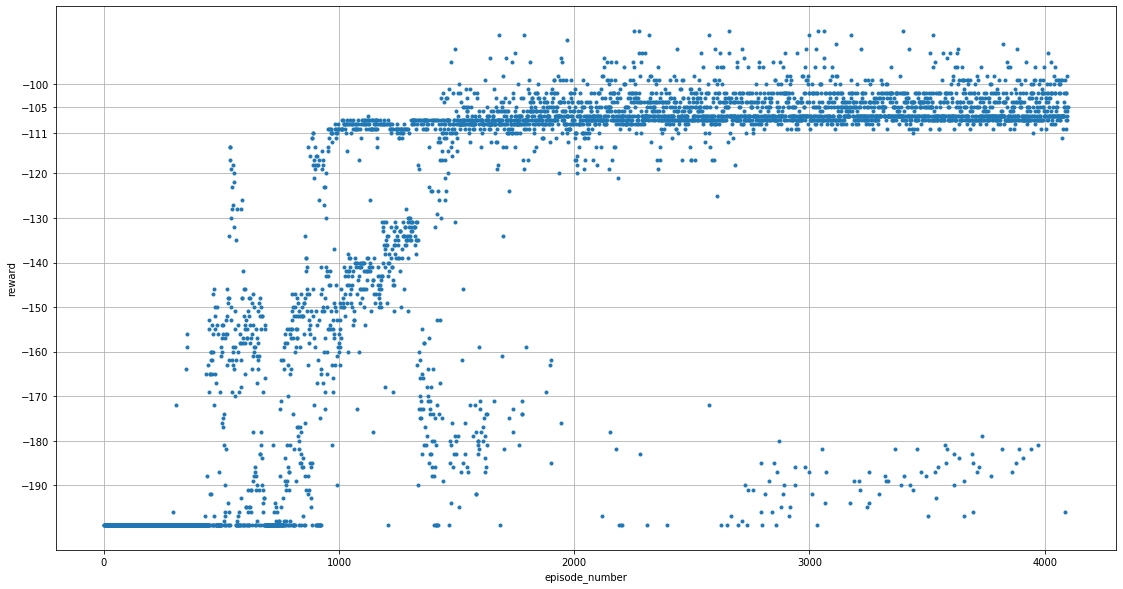

In [168]:
fig, ax = plt.subplots(figsize = (19, 10))
plt.ylabel("reward")
plt.xlabel("episode_number")
plt.yticks([-100, -105, -111]+[i for i in range(-120, -200, -10)])
plt.grid()
plt.plot(agent.collectiveRecord[:],'.')
plt.show()

In [174]:
np.mean(agent.collectiveRecord[-100:])

-108.4

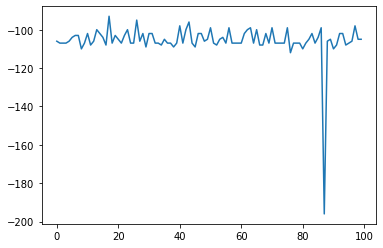

In [170]:
plt.plot(agent.collectiveRecord[-100:], )